In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib as jb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [37]:
abv_data = pd.read_csv('PMC7727026_abbreviated.csv')

In [38]:
abv_data.head()

,Author and Year,Group,Study Weight Percentage,Percent male (%),Race with largest number,Age (years),Height (cm),Weight (kg),BMI (kg/m2),Health state,Duration (weeks),Type ofExercise,(times/week),Energy balance,Protein intake (g/kg/day),Energy intake (kcal/kg/day),LBM change (kg),LBM change per week (kg/wk),Relative LBM change,Relative LBM change per week
0,Campbell (1995) [1],Experimental,0.3,83,Caucasian,65.0,173.3,78.0,26.0,Healthy,12,Resistance exercise,3,No intervention,2.40,37.0,1.8,0.150000,0.023077,0.001923
1,Rozenek (2002) [2],Experimental,0.5,100,Caucasian,23.2,178.3,76.4,24.1,Healthy,8,Resistance exercise,4,Intake > Expenditure,3.30,63.3,2.9,0.362500,0.037958,0.004745
2,Flakoll (2004) [3],Experimental,0.9,100,Caucasian,18.9,177.0,74.9,23.4,Healthy,8,Resistance exercise & other exercise,4,No intervention,NaN,NaN,-2.7,-0.337500,-0.036048,-0.004506
3,Rankin (2004) [4],Experimental,0.6,100,Caucasian,20.8,177.5,78.9,25.1,Healthy,10,Resistance exercise,3,No intervention,1.25,33.3,1.6,0.160000,0.020279,0.002028
4,Layman (2005) (with RT) [5],Experimental,1.0,0,Caucasian,46.7,163.2,87.7,33.0,Healthy,17,Resistance exercise & other exercise,2,Intake < Expenditure,NaN,NaN,-0.4,-0.023529,-0.004561,-0.000268


In [39]:
abv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Author and Year               112 non-null    object 
 1   Group                         112 non-null    object 
 2   Study Weight Percentage       112 non-null    float64
 3   Percent male (%)              112 non-null    int64  
 4   Race with largest number      112 non-null    object 
 5   Age (years)                   112 non-null    float64
 6   Height (cm)                   110 non-null    float64
 7   Weight (kg)                   110 non-null    float64
 8   BMI (kg/m2)                   112 non-null    float64
 9   Health state                  112 non-null    object 
 10  Duration (weeks)              112 non-null    int64  
 11  Type ofExercise               112 non-null    object 
 12  (times/week)                  112 non-null    int64  
 13  Energ

In [40]:
abv_data.describe

<bound method NDFrame.describe of                  Author and Year         Group  Study Weight Percentage  \
0            Campbell (1995) [1]  Experimental                      0.3   
1             Rozenek (2002) [2]  Experimental                      0.5   
2             Flakoll (2004) [3]  Experimental                      0.9   
3              Rankin (2004) [4]  Experimental                      0.6   
4    Layman (2005) (with RT) [5]  Experimental                      1.0   
..                           ...           ...                      ...   
107        Fernandes (2018) [49]       Control                      1.1   
108        Galbreath (2018) [50]       Control                      1.0   
109     Sharp (2018) (Beef) [51]       Control                      0.3   
110          Vangsoe (2018) [52]       Control                      0.7   
111    Nabuco (2019) (Post) [53]       Control                      1.1   

     Percent male (%) Race with largest number  Age (years)  Heig

In [41]:
abv_data.isnull().sum()

Author and Year                  0
Group                            0
Study Weight Percentage          0
Percent male (%)                 0
Race with largest number         0
Age (years)                      0
Height (cm)                      2
Weight (kg)                      2
BMI (kg/m2)                      0
Health state                     0
Duration (weeks)                 0
Type ofExercise                  0
(times/week)                     0
Energy balance                   0
Protein intake (g/kg/day)       17
Energy intake (kcal/kg/day)     19
LBM change (kg)                  0
LBM change per week (kg/wk)      0
Relative LBM change              2
Relative LBM change per week     2
dtype: int64

In [42]:
abv_data.fillna(abv_data.mean(numeric_only= True),inplace = True)
abv_data.head()

,Author and Year,Group,Study Weight Percentage,Percent male (%),Race with largest number,Age (years),Height (cm),Weight (kg),BMI (kg/m2),Health state,Duration (weeks),Type ofExercise,(times/week),Energy balance,Protein intake (g/kg/day),Energy intake (kcal/kg/day),LBM change (kg),LBM change per week (kg/wk),Relative LBM change,Relative LBM change per week
0,Campbell (1995) [1],Experimental,0.3,83,Caucasian,65.0,173.3,78.0,26.0,Healthy,12,Resistance exercise,3,No intervention,2.400000,37.000000,1.8,0.150000,0.023077,0.001923
1,Rozenek (2002) [2],Experimental,0.5,100,Caucasian,23.2,178.3,76.4,24.1,Healthy,8,Resistance exercise,4,Intake > Expenditure,3.300000,63.300000,2.9,0.362500,0.037958,0.004745
2,Flakoll (2004) [3],Experimental,0.9,100,Caucasian,18.9,177.0,74.9,23.4,Healthy,8,Resistance exercise & other exercise,4,No intervention,1.516211,30.849892,-2.7,-0.337500,-0.036048,-0.004506
3,Rankin (2004) [4],Experimental,0.6,100,Caucasian,20.8,177.5,78.9,25.1,Healthy,10,Resistance exercise,3,No intervention,1.250000,33.300000,1.6,0.160000,0.020279,0.002028
4,Layman (2005) (with RT) [5],Experimental,1.0,0,Caucasian,46.7,163.2,87.7,33.0,Healthy,17,Resistance exercise & other exercise,2,Intake < Expenditure,1.516211,30.849892,-0.4,-0.023529,-0.004561,-0.000268


<Axes: xlabel='Protein intake (g/kg/day)', ylabel='Energy intake (kcal/kg/day)'>

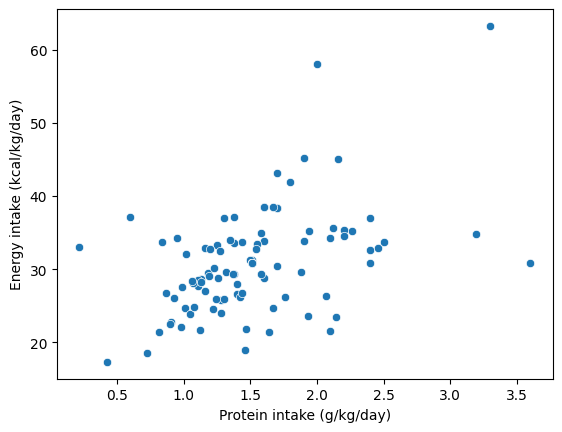

In [43]:
sns.scatterplot(x = abv_data['Protein intake (g/kg/day)' ], y =abv_data['Energy intake (kcal/kg/day)'])

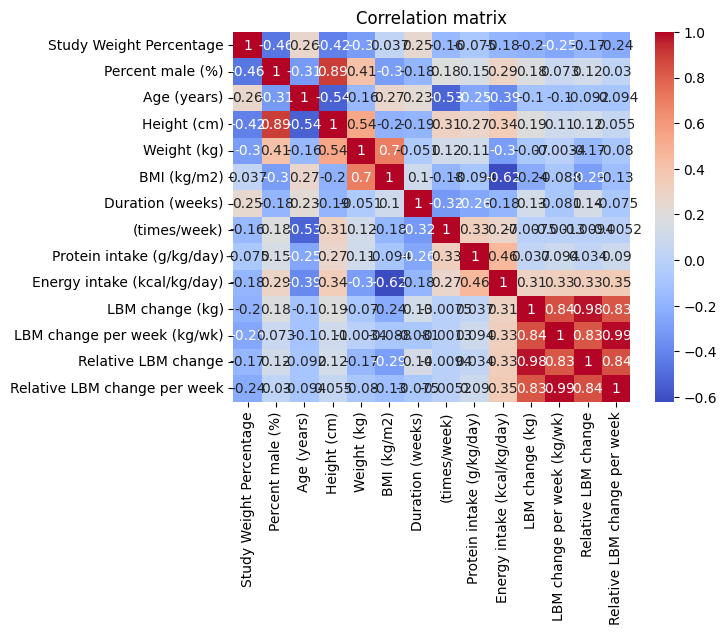

In [44]:
numeric_df = abv_data.select_dtypes(include = [np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot= True, cmap= 'coolwarm')
plt.title('Correlation matrix')
plt.show()

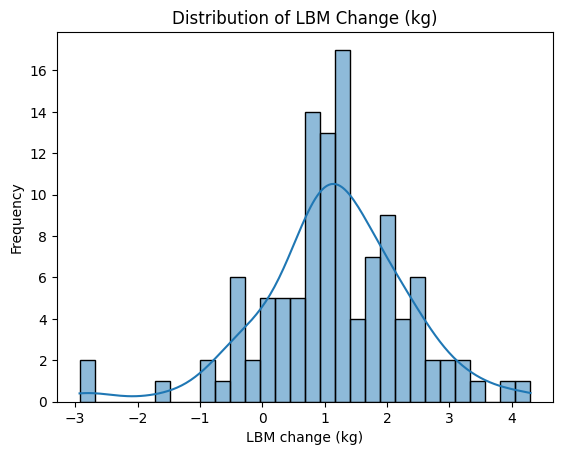

In [45]:
sns.histplot(abv_data['LBM change (kg)'], bins = 30, kde= True)
plt.ylabel('Frequency')
plt.title('Distribution of LBM Change (kg)')
plt.show()

In [46]:
abv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Author and Year               112 non-null    object 
 1   Group                         112 non-null    object 
 2   Study Weight Percentage       112 non-null    float64
 3   Percent male (%)              112 non-null    int64  
 4   Race with largest number      112 non-null    object 
 5   Age (years)                   112 non-null    float64
 6   Height (cm)                   112 non-null    float64
 7   Weight (kg)                   112 non-null    float64
 8   BMI (kg/m2)                   112 non-null    float64
 9   Health state                  112 non-null    object 
 10  Duration (weeks)              112 non-null    int64  
 11  Type ofExercise               112 non-null    object 
 12  (times/week)                  112 non-null    int64  
 13  Energ

In [47]:
features = ['Protein intake (g/kg/day)', 'Energy intake (kcal/kg/day)', 'BMI (kg/m2)', 'Age (years)', '(times/week)']
target_variable = 'LBM change (kg)'

X = abv_data[features]
y= abv_data[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

mse, r2

(1.6224796716976504, -0.4342274309143932)

<function matplotlib.pyplot.show(close=None, block=None)>

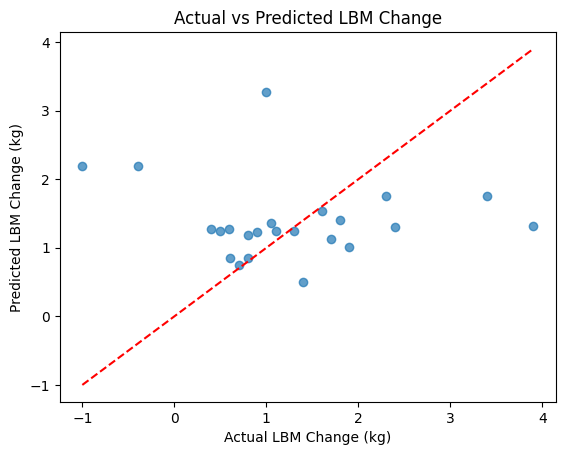

In [48]:
plt.scatter(y_test, prediction, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual LBM Change (kg)')
plt.ylabel('Predicted LBM Change (kg)')
plt.title('Actual vs Predicted LBM Change')
plt.legend
plt.show

In [49]:
from sklearn.ensemble import RandomForestRegressor

features = ['Protein intake (g/kg/day)', 'Energy intake (kcal/kg/day)', 'BMI (kg/m2)', 'Age (years)', 'Duration (weeks)', '(times/week)', 'Weight (kg)']

target_variable = 'LBM change (kg)'

X = abv_data[features]
y = abv_data[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize the Random Forest model 
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Absolute Error (MAE): 0.7411
Mean Squared Error (MSE): 0.8025
Root Mean Squared Error (RMSE): 0.8958
R² Score: 0.2906


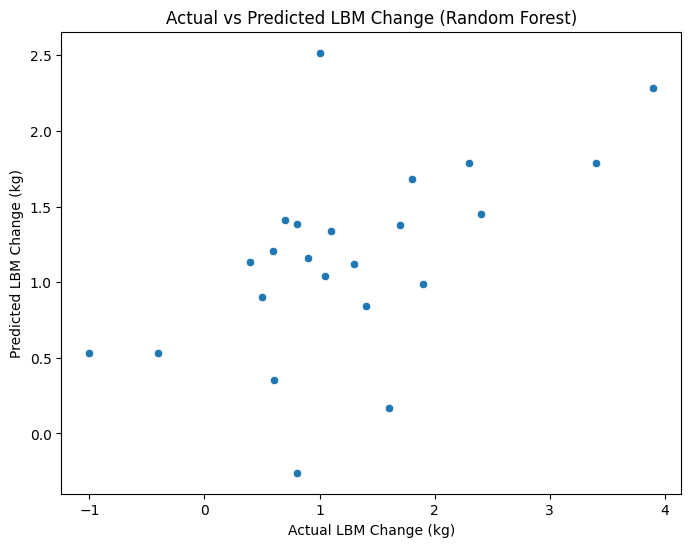

In [50]:
# Visualize actual vs predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual LBM Change (kg)')
plt.ylabel('Predicted LBM Change (kg)')
plt.title('Actual vs Predicted LBM Change (Random Forest)')
plt.show()

In [51]:
jb.dump(model, "random_forest_model.pkl")

['random_forest_model.pkl']